In [33]:
import pandas as pd

# Load the uploaded dataset to examine its structure and contents
file_path = 'diabetes_data.csv'
diabetes_data = pd.read_csv(file_path)

# Display the first few rows and column information for analysis
diabetes_data_info = diabetes_data.info()
diabetes_data_head = diabetes_data.head()

diabetes_data_info, diabetes_data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                             Non-Null Count  Dtype 
---  ------                                                                                                                                                                                             --------------  ----- 
 0   age;gender;polyuria;polydipsia;sudden_weight_loss;weakness;polyphagia;genital_thrush;visual_blurring;itching;irritability;delayed_healing;partial_paresis;muscle_stiffness;alopecia;obesity;class  520 non-null    object
dtypes: object(1)
memory usage: 4.2+ KB


(None,
   age;gender;polyuria;polydipsia;sudden_weight_loss;weakness;polyphagia;genital_thrush;visual_blurring;itching;irritability;delayed_healing;partial_paresis;muscle_stiffness;alopecia;obesity;class
 0              40;Male;0;1;0;1;0;0;0;1;0;1;0;1;1;1;1                                                                                                                                               
 1              58;Male;0;0;0;1;0;0;1;0;0;0;1;0;1;0;1                                                                                                                                               
 2              41;Male;1;0;0;1;1;0;0;1;0;1;0;1;1;0;1                                                                                                                                               
 3              45;Male;0;0;1;1;1;1;0;1;0;1;0;0;0;0;1                                                                                                                                               
 4      

In [34]:
# Assuming your dataframe is named 'diabetes_data'
diabetes_data = diabetes_data.drop_duplicates()

# Verify that duplicates have been removed
print(f"Dataset shape after removing duplicates: {diabetes_data.shape}")


Dataset shape after removing duplicates: (251, 1)


In [35]:
# Splitting the single column into individual features based on the semicolon delimiter
diabetes_data_cleaned = diabetes_data['age;gender;polyuria;polydipsia;sudden_weight_loss;weakness;polyphagia;genital_thrush;visual_blurring;itching;irritability;delayed_healing;partial_paresis;muscle_stiffness;alopecia;obesity;class']\
    .str.split(';', expand=True)

# Renaming columns based on the original dataset structure
diabetes_data_cleaned.columns = [
    'age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness',
    'polyphagia', 'genital_thrush', 'visual_blurring', 'itching', 'irritability',
    'delayed_healing', 'partial_paresis', 'muscle_stiffness', 'alopecia', 'obesity', 'class'
]

# Converting data types where appropriate
diabetes_data_cleaned['age'] = pd.to_numeric(diabetes_data_cleaned['age'], errors='coerce')
diabetes_data_cleaned['class'] = diabetes_data_cleaned['class'].astype(int)

# Displaying a summary of the cleaned data
diabetes_data_cleaned_info = diabetes_data_cleaned.info()
diabetes_data_cleaned_head = diabetes_data_cleaned.head()

diabetes_data_cleaned_info, diabetes_data_cleaned_head


<class 'pandas.core.frame.DataFrame'>
Index: 251 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 251 non-null    int64 
 1   gender              251 non-null    object
 2   polyuria            251 non-null    object
 3   polydipsia          251 non-null    object
 4   sudden_weight_loss  251 non-null    object
 5   weakness            251 non-null    object
 6   polyphagia          251 non-null    object
 7   genital_thrush      251 non-null    object
 8   visual_blurring     251 non-null    object
 9   itching             251 non-null    object
 10  irritability        251 non-null    object
 11  delayed_healing     251 non-null    object
 12  partial_paresis     251 non-null    object
 13  muscle_stiffness    251 non-null    object
 14  alopecia            251 non-null    object
 15  obesity             251 non-null    object
 16  class               251 non-nul

(None,
    age gender polyuria polydipsia sudden_weight_loss weakness polyphagia  \
 0   40   Male        0          1                  0        1          0   
 1   58   Male        0          0                  0        1          0   
 2   41   Male        1          0                  0        1          1   
 3   45   Male        0          0                  1        1          1   
 4   60   Male        1          1                  1        1          1   
 
   genital_thrush visual_blurring itching irritability delayed_healing  \
 0              0               0       1            0               1   
 1              0               1       0            0               0   
 2              0               0       1            0               1   
 3              1               0       1            0               1   
 4              0               1       1            1               1   
 
   partial_paresis muscle_stiffness alopecia obesity  class  
 0               0   

## PCA

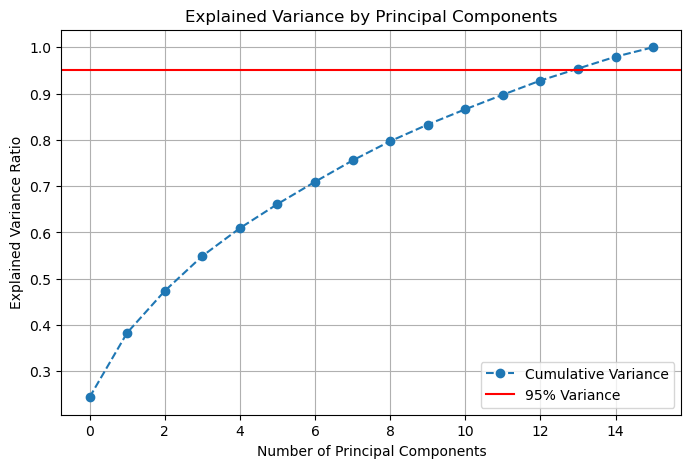

Number of components to retain 95% variance: 14

Explained Variance by Component:
Principal Component 1: 0.2442
Principal Component 2: 0.1392
Principal Component 3: 0.0903
Principal Component 4: 0.0754
Principal Component 5: 0.0602
Principal Component 6: 0.0520
Principal Component 7: 0.0481
Principal Component 8: 0.0461
Principal Component 9: 0.0415
Principal Component 10: 0.0360
Principal Component 11: 0.0330
Principal Component 12: 0.0315

Top contributing features to the first 12 principal components:
                         PC1       PC2       PC3       PC4       PC5  \
age                 0.247639  0.332163 -0.037396  0.268348 -0.139031   
gender             -0.210226  0.314712  0.183609  0.209758 -0.142707   
polyuria            0.341376 -0.176358  0.276735 -0.037978 -0.085701   
polydipsia          0.347392 -0.234118  0.162873 -0.070116  0.058947   
sudden_weight_loss  0.252097 -0.225500  0.352508 -0.072283  0.224008   
weakness            0.286994  0.124274  0.021332 -0.222908

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
# Replace 'your_dataset.csv' with the actual file path
diabetes_data = pd.read_csv('diabetes_data.csv')

# Split the single column if needed (adjust column splitting as necessary)
diabetes_data_cleaned = diabetes_data['age;gender;polyuria;polydipsia;sudden_weight_loss;weakness;polyphagia;genital_thrush;visual_blurring;itching;irritability;delayed_healing;partial_paresis;muscle_stiffness;alopecia;obesity;class'] \
    .str.split(';', expand=True)

# Rename the columns
diabetes_data_cleaned.columns = [
    'age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness',
    'polyphagia', 'genital_thrush', 'visual_blurring', 'itching', 'irritability',
    'delayed_healing', 'partial_paresis', 'muscle_stiffness', 'alopecia', 'obesity', 'class'
]

# Convert data types
diabetes_data_cleaned['age'] = pd.to_numeric(diabetes_data_cleaned['age'], errors='coerce')
diabetes_data_cleaned['gender'] = diabetes_data_cleaned['gender'].map({'Male': 1, 'Female': 0})
binary_columns = [
    'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness', 'polyphagia',
    'genital_thrush', 'visual_blurring', 'itching', 'irritability',
    'delayed_healing', 'partial_paresis', 'muscle_stiffness', 'alopecia', 'obesity'
]
diabetes_data_cleaned[binary_columns] = diabetes_data_cleaned[binary_columns].astype(int)
diabetes_data_cleaned['class'] = diabetes_data_cleaned['class'].astype(int)

# Separate features and target
features = diabetes_data_cleaned.drop(columns=['class'])
target = diabetes_data_cleaned['class']

# Standardize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply PCA
pca = PCA()
features_pca = pca.fit_transform(features_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

# Plot explained variance
plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance, marker='o', linestyle='--', label="Cumulative Variance")
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Variance')
plt.legend()
plt.grid()
plt.show()

# Determine the number of components for 95% variance
num_components_95 = (cumulative_variance >= 0.95).argmax() + 1
print(f"Number of components to retain 95% variance: {num_components_95}")

# Display explained variance for each component
print("\nExplained Variance by Component:")
for i, variance in enumerate(explained_variance_ratio[:12]):
    print(f"Principal Component {i + 1}: {variance:.4f}")

# Display the top contributing features to the first 12 principal components
pca_optimal = PCA(n_components=12)
features_reduced = pca_optimal.fit_transform(features_scaled)

# Get the component loadings (contributions of original features)
loadings = pca_optimal.components_

# Create a DataFrame for easy visualization
feature_names = features.columns
loadings_df = pd.DataFrame(loadings.T, index=feature_names, columns=[f'PC{i+1}' for i in range(12)])

print("\nTop contributing features to the first 12 principal components:")
print(loadings_df)

# Optionally, to see the absolute contributions and sort them
for i in range(12):
    print(f"\nTop features contributing to PC{i+1}:")
    top_features = loadings_df[f'PC{i+1}'].abs().sort_values(ascending=False).head(5)
    print(top_features)


Random Forest is likely the best fit for  data because:

1. It handles both numerical and categorical features well.
2. It can model non-linear relationships between features.
3. It is robust to outliers and noise.
4. It performs well with imbalanced datasets.
5. It reduces the risk of overfitting through ensemble learning.
6. It provides feature importance, which can be useful for understanding your data.

## Logistic Regression model

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Load the dataset
data = 'diabetes_data.csv'  # Replace with your file path
diabetes_data = pd.read_csv(data)

# Split the single column into multiple columns based on the semicolon delimiter
diabetes_data_cleaned = diabetes_data.iloc[:, 0].str.split(';', expand=True)

# Rename columns
columns = [
    "age", "gender", "polyuria", "polydipsia", "sudden_weight_loss", "weakness", 
    "polyphagia", "genital_thrush", "visual_blurring", "itching", "irritability", 
    "delayed_healing", "partial_paresis", "muscle_stiffness", "alopecia", "obesity", 
    "class"
]
diabetes_data_cleaned.columns = columns

# Encode categorical variables
label_encoders = {}
for column in ['gender', 'class']:
    le = LabelEncoder()
    diabetes_data_cleaned[column] = le.fit_transform(diabetes_data_cleaned[column])
    label_encoders[column] = le

# Separate features and target
X = diabetes_data_cleaned.drop(columns=["class"])
y = diabetes_data_cleaned["class"]

# Normalize numerical features
scaler = StandardScaler()
X[['age']] = scaler.fit_transform(X[['age']])

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Logistic Regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Make predictions
y_pred = logistic_model.predict(X_test)
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
classification_rep = classification_report(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")
print("Classification Report:")
print(classification_rep)


Accuracy: 0.94
ROC-AUC Score: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        40
           1       0.98      0.92      0.95        64

    accuracy                           0.94       104
   macro avg       0.93      0.95      0.94       104
weighted avg       0.95      0.94      0.94       104



## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Train Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Make predictions
y_pred_tree = decision_tree_model.predict(X_test)
y_pred_proba_tree = decision_tree_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
roc_auc_tree = roc_auc_score(y_test, y_pred_proba_tree)
classification_rep_tree = classification_report(y_test, y_pred_tree)

# Display results
print(f"Decision Tree Accuracy: {accuracy_tree:.2f}")
print(f"Decision Tree ROC-AUC Score: {roc_auc_tree:.2f}")
print("Decision Tree Classification Report:")
print(classification_rep_tree)


Decision Tree Accuracy: 0.99
Decision Tree ROC-AUC Score: 0.99
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        40
           1       1.00      0.98      0.99        64

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Train Random Forest Classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = random_forest_model.predict(X_test)
y_pred_proba_rf = random_forest_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

# Display results
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")
print(f"Random Forest ROC-AUC Score: {roc_auc_rf:.2f}")
print("Random Forest Classification Report:")
print(classification_rep_rf)


Random Forest Accuracy: 0.99
Random Forest ROC-AUC Score: 1.00
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        40
           1       1.00      0.98      0.99        64

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Train Gradient Boosting Classifier
gradient_boosting_model = GradientBoostingClassifier(random_state=42)
gradient_boosting_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gradient_boosting_model.predict(X_test)
y_pred_proba_gb = gradient_boosting_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, y_pred_proba_gb)
classification_rep_gb = classification_report(y_test, y_pred_gb)

# Display results
print(f"Gradient Boosting Accuracy: {accuracy_gb:.2f}")
print(f"Gradient Boosting ROC-AUC Score: {roc_auc_gb:.2f}")
print("Gradient Boosting Classification Report:")
print(classification_rep_gb)


Gradient Boosting Accuracy: 0.99
Gradient Boosting ROC-AUC Score: 0.99
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        40
           1       1.00      0.98      0.99        64

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



## Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Train Support Vector Machine
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)
y_pred_proba_svm = svm_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
roc_auc_svm = roc_auc_score(y_test, y_pred_proba_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)

# Display results
print(f"SVM Accuracy: {accuracy_svm:.2f}")
print(f"SVM ROC-AUC Score: {roc_auc_svm:.2f}")
print("SVM Classification Report:")
print(classification_rep_svm)


SVM Accuracy: 0.99
SVM ROC-AUC Score: 1.00
SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       0.98      1.00      0.99        64

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



## k-Nearest Neighbors (k-NN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Train k-NN Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)
y_pred_proba_knn = knn_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, y_pred_proba_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn)

# Display results
print(f"k-NN Accuracy: {accuracy_knn:.2f}")
print(f"k-NN ROC-AUC Score: {roc_auc_knn:.2f}")
print("k-NN Classification Report:")
print(classification_rep_knn)


k-NN Accuracy: 0.93
k-NN ROC-AUC Score: 0.97
k-NN Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92        40
           1       0.98      0.91      0.94        64

    accuracy                           0.93       104
   macro avg       0.92      0.94      0.93       104
weighted avg       0.94      0.93      0.93       104



## Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier

# Train Neural Network (MLP Classifier)
mlp_model = MLPClassifier(random_state=42, max_iter=500)
mlp_model.fit(X_train, y_train)

# Make predictions
y_pred_mlp = mlp_model.predict(X_test)
y_pred_proba_mlp = mlp_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
roc_auc_mlp = roc_auc_score(y_test, y_pred_proba_mlp)
classification_rep_mlp = classification_report(y_test, y_pred_mlp)

# Display results
print(f"Neural Network Accuracy: {accuracy_mlp:.2f}")
print(f"Neural Network ROC-AUC Score: {roc_auc_mlp:.2f}")
print("Neural Network Classification Report:")
print(classification_rep_mlp)


Neural Network Accuracy: 0.97
Neural Network ROC-AUC Score: 1.00
Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        40
           1       0.98      0.97      0.98        64

    accuracy                           0.97       104
   macro avg       0.97      0.97      0.97       104
weighted avg       0.97      0.97      0.97       104



## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Train Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test)
y_pred_proba_nb = nb_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
roc_auc_nb = roc_auc_score(y_test, y_pred_proba_nb)
classification_rep_nb = classification_report(y_test, y_pred_nb)

# Display results
print(f"Naive Bayes Accuracy: {accuracy_nb:.2f}")
print(f"Naive Bayes ROC-AUC Score: {roc_auc_nb:.2f}")
print("Naive Bayes Classification Report:")
print(classification_rep_nb)


Naive Bayes Accuracy: 0.94
Naive Bayes ROC-AUC Score: 0.99
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93        40
           1       0.97      0.94      0.95        64

    accuracy                           0.94       104
   macro avg       0.94      0.94      0.94       104
weighted avg       0.94      0.94      0.94       104



## Ensemble Stacking

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Define base learners
estimators = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42)),
    ('svm', SVC(probability=True, random_state=42))
]

# Train Stacking Classifier
stacking_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stacking_model.fit(X_train, y_train)

# Make predictions
y_pred_stack = stacking_model.predict(X_test)
y_pred_proba_stack = stacking_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy_stack = accuracy_score(y_test, y_pred_stack)
roc_auc_stack = roc_auc_score(y_test, y_pred_proba_stack)
classification_rep_stack = classification_report(y_test, y_pred_stack)

# Display results
print(f"Stacking Accuracy: {accuracy_stack:.2f}")
print(f"Stacking ROC-AUC Score: {roc_auc_stack:.2f}")
print("Stacking Classification Report:")
print(classification_rep_stack)


Stacking Accuracy: 0.99
Stacking ROC-AUC Score: 1.00
Stacking Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        40
           1       1.00      0.98      0.99        64

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



## XGBoost

In [ ]:
from sklearn.impute import SimpleImputer

# Fill missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Train XGBoost Classifier
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

print(f"XGBoost Accuracy: {accuracy_xgb:.2f}")
print(f"XGBoost ROC-AUC Score: {roc_auc_xgb:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.98
XGBoost ROC-AUC Score: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        40
           1       1.00      0.97      0.98        64

    accuracy                           0.98       104
   macro avg       0.98      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104



c:\Users\2004a\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:24:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


## LightGBM

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical columns to numeric using Label Encoding
categorical_columns = [
    'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness', 'polyphagia',
    'genital_thrush', 'visual_blurring', 'itching', 'irritability', 'delayed_healing',
    'partial_paresis', 'muscle_stiffness', 'alopecia', 'obesity'
]

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for column in categorical_columns:
    X_train[column] = le.fit_transform(X_train[column])
    X_test[column] = le.transform(X_test[column])

# Check the data types after conversion
print(X_train.dtypes)


age                   float64
gender                float64
polyuria                int64
polydipsia              int64
sudden_weight_loss      int64
weakness                int64
polyphagia              int64
genital_thrush          int64
visual_blurring         int64
itching                 int64
irritability            int64
delayed_healing         int64
partial_paresis         int64
muscle_stiffness        int64
alopecia                int64
obesity                 int64
dtype: object


In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Train LightGBM Classifier
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)

# Make predictions
y_pred_lgbm = lgbm_model.predict(X_test)
y_pred_proba_lgbm = lgbm_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
roc_auc_lgbm = roc_auc_score(y_test, y_pred_proba_lgbm)

print(f"LightGBM Accuracy: {accuracy_lgbm:.2f}")
print(f"LightGBM ROC-AUC Score: {roc_auc_lgbm:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_lgbm))


[LightGBM] [Info] Number of positive: 256, number of negative: 160
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000578 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 76
[LightGBM] [Info] Number of data points in the train set: 416, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.615385 -> initscore=0.470004
[LightGBM] [Info] Start training from score 0.470004
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L